# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [527]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])
# Display the data table for preview
complete_data.round()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,k403,Ramicane,Male,21,16,5,39.0,0
2,k403,Ramicane,Male,21,16,10,35.0,1
3,k403,Ramicane,Male,21,16,15,34.0,1
4,k403,Ramicane,Male,21,16,20,33.0,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.0,2
1889,z969,Naftisol,Male,9,30,30,66.0,3
1890,z969,Naftisol,Male,9,30,35,69.0,4
1891,z969,Naftisol,Male,9,30,40,70.0,4


In [528]:
# Checking the number of mice.
mouse_count = len(complete_data['Mouse ID'].unique())
mouse_count

249

In [529]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id_timepoint = complete_data[complete_data.duplicated(['Timepoint', 'Mouse ID'])]
# print(len(duplicate_mouse_id_timepoint))
duplicate_mouse_id_timepoint.round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.00,0
911,g989,Propriva,Female,21,26,5,47.57,0
913,g989,Propriva,Female,21,26,10,49.88,0
915,g989,Propriva,Female,21,26,15,53.44,0
917,g989,Propriva,Female,21,26,20,54.66,1


In [530]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_ids = complete_data[complete_data.duplicated(['Mouse ID'])]

duplicate_mouse_ids.round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.83,0
2,k403,Ramicane,Male,21,16,10,35.01,1
3,k403,Ramicane,Male,21,16,15,34.22,1
4,k403,Ramicane,Male,21,16,20,33.00,1
5,k403,Ramicane,Male,21,16,25,33.46,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.15,2
1889,z969,Naftisol,Male,9,30,30,65.84,3
1890,z969,Naftisol,Male,9,30,35,69.18,4
1891,z969,Naftisol,Male,9,30,40,70.31,4


In [531]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = complete_data.drop_duplicates(['Mouse ID'], keep='last')
clean_df.round(2)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.05,1
19,s185,Capomulin,Female,3,17,45,23.34,1
29,x401,Capomulin,Female,16,15,45,28.48,0
39,m601,Capomulin,Male,22,17,45,28.43,1
49,g791,Ramicane,Male,11,16,45,29.13,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.93,0
1862,z435,Propriva,Female,12,26,10,48.71,0
1872,z581,Infubinol,Female,24,25,45,62.75,3
1882,z795,Naftisol,Female,13,29,45,65.74,3


In [532]:
# Checking the number of mice in the clean DataFrame.
mice_clean_df_count = len(clean_df)
mice_clean_df_count

249

## Summary Statistics

In [729]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# The sem() method calculates the standard error of the mean for each column.

summary_table = pd.DataFrame({
    "Mean Of Tumor Volume":complete_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)'],
    "Median Of Tumor Volume":complete_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)'],
    "Variance Of Tumor Volume":complete_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)'],
    "Standard Deviation Of Tumor Volume":complete_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)'],
    "SEM Of Tumor Volume":complete_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)'],
})
summary_table.round(2)

,Mean Of Tumor Volume,Median Of Tumor Volume,Variance Of Tumor Volume,Standard Deviation Of Tumor Volume,SEM Of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [730]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_table_agggregation = complete_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])
summary_table_agggregation.round(2)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

<AxesSubplot:title={'center':'Mice Per Drug Regimen'}, xlabel='Drug Name', ylabel='Number of Mice'>

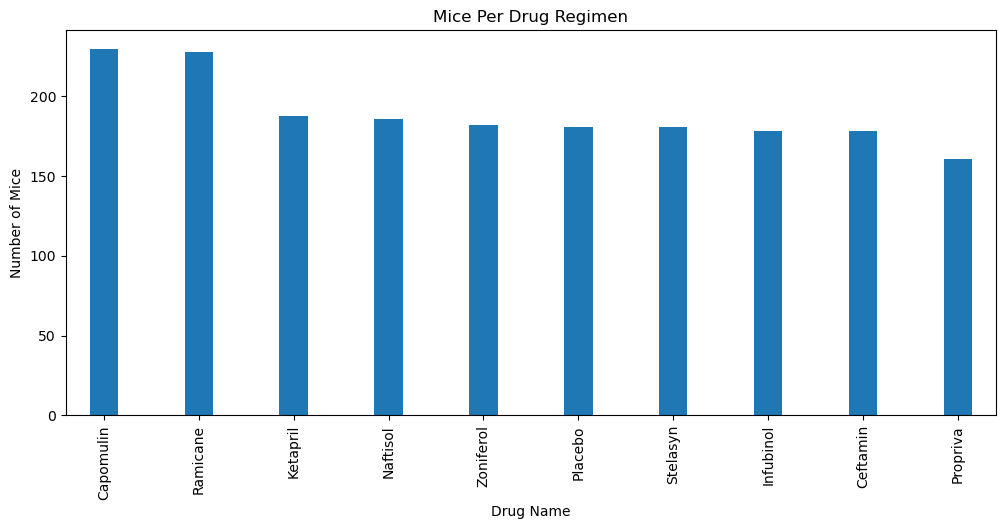

In [926]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pandas_plot = complete_data["Drug Regimen"].value_counts().plot(kind='bar', width=.3, figsize = (12, 5), xlabel="Drug Name", ylabel="Number of Mice", title="Mice Per Drug Regimen") 
pandas_plot

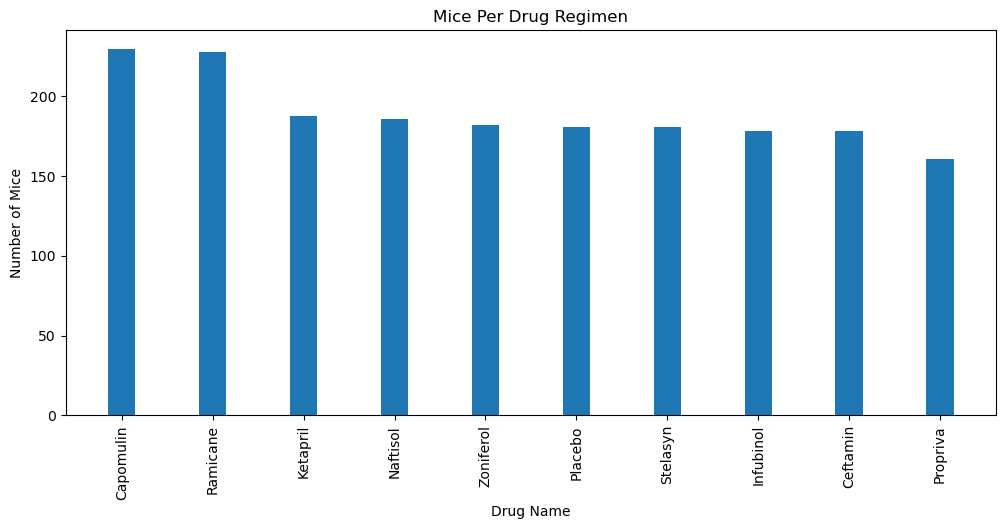

In [1173]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
singleColumn = complete_data["Drug Regimen"].value_counts()
fig = plt.figure(figsize = (12, 5))
plt.bar(singleColumn.index.values, singleColumn.values, width=.3 )
plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Name",)
plt.ylabel("Number of Mice")
plt.xticks(rotation="vertical")
plt.show()

In [1174]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

In [1175]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [1176]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [1177]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [1178]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

## Line and Scatter Plots

In [1179]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [1180]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

## Correlation and Regression

In [1181]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen